
   🤖 ANALYSEUR DATASET ASL - LANGUE DES SIGNES 🤟

🔍 SCAN DU DATASET
✅ Utilisateurs trouvés: 25
✅ Gestes différents: 40
✅ Fichiers totaux: 1000

📁 Utilisateurs: 001, 002, 003, 004, 005... (total: 25)

🤟 Gestes détectés (40 gestes):
   - a: 25 fichiers
   - b: 25 fichiers
   - bad: 25 fichiers
   - c: 25 fichiers
   - d: 25 fichiers
   - deaf: 25 fichiers
   - e: 25 fichiers
   - f: 25 fichiers
   - fine: 25 fichiers
   - g: 25 fichiers
   ... et 30 autres gestes

📊 STATISTIQUES GLOBALES

🔍 Analyse du geste: a

🔍 Analyse du geste: b

🔍 Analyse du geste: bad

🔍 Analyse du geste: c

🔍 Analyse du geste: d

✅ Fichiers analysés: 25
✅ Échantillons totaux: 37,500
✅ Moyenne échantillons/geste: 1500.0
✅ Durée moyenne geste: 34.00 secondes
✅ Nombre de colonnes: 23 (cohérent: True)

📉 CRÉATION DES VISUALISATIONS
📂 Fichier exemple: a.csv
📊 Nombre d'échantillons: 1500
✅ Visualisation sauvegardée: asl_dataset_analysis.png


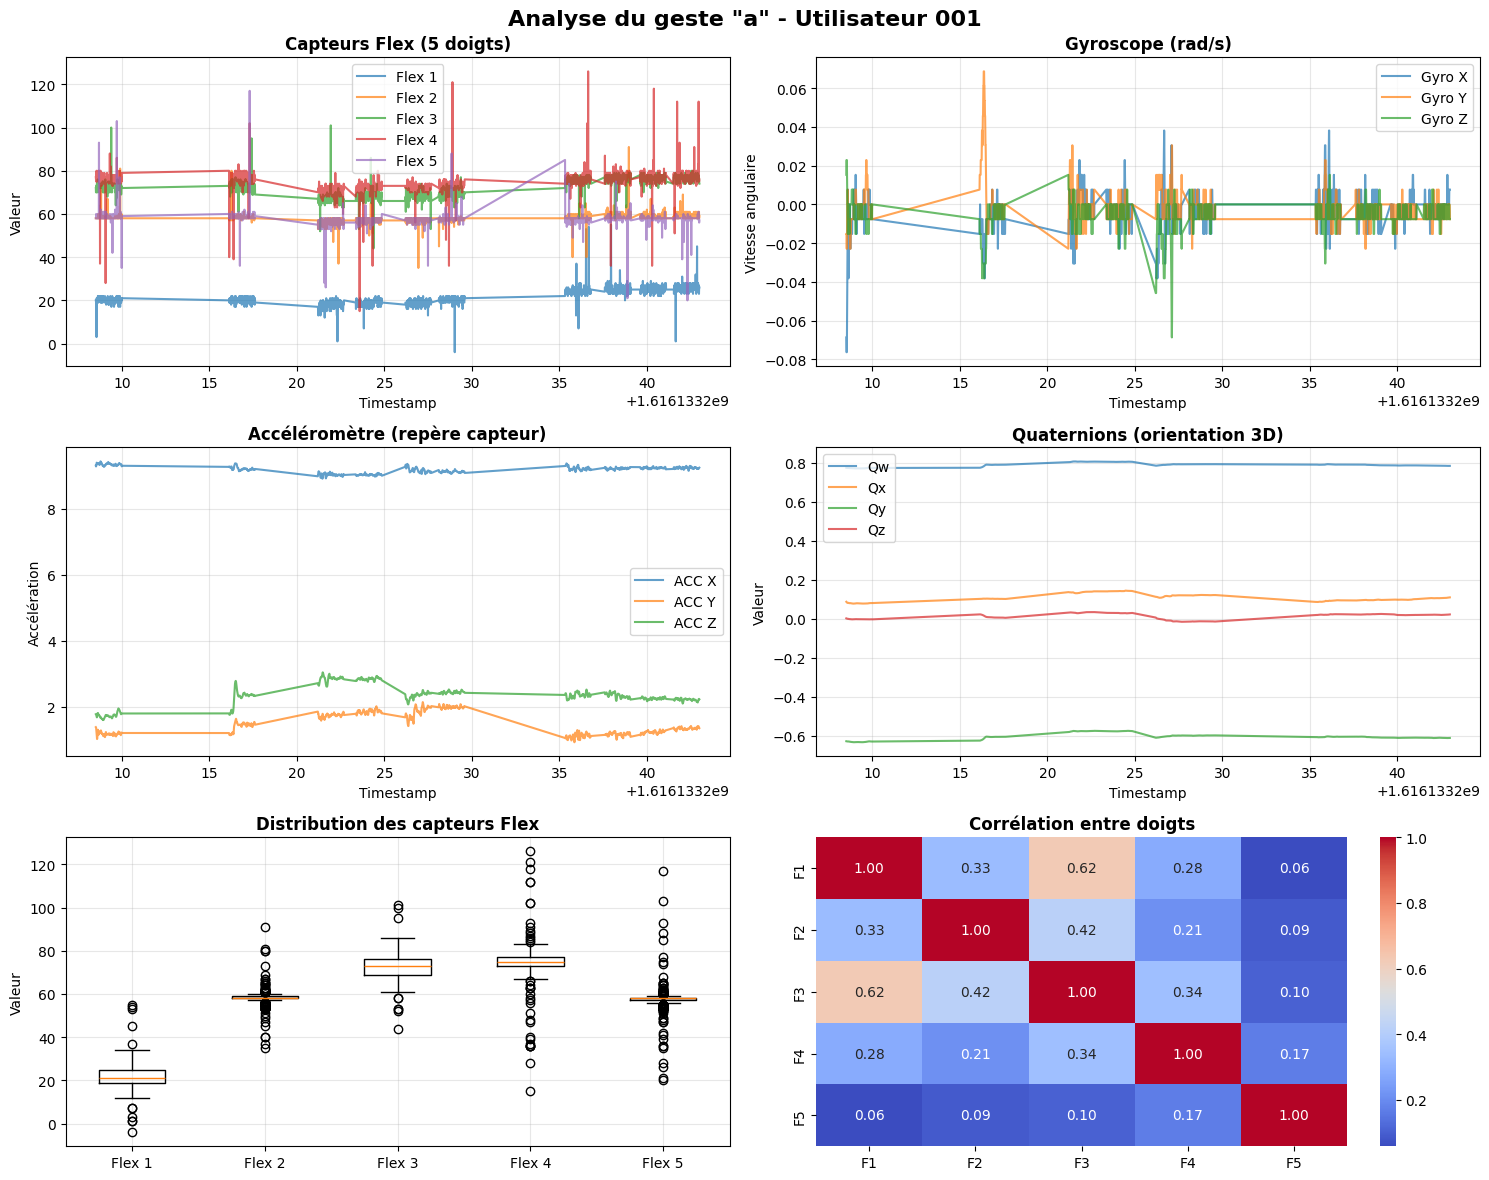


📋 RAPPORT DÉTAILLÉ DU DATASET

╔════════════════════════════════════════════════════════════╗
║           ANALYSE DATASET ASL - LANGUE DES SIGNES          ║
╚════════════════════════════════════════════════════════════╝

📊 INFORMATIONS GÉNÉRALES
────────────────────────────────────────────────────────────
• Utilisateurs totaux:        25
• Gestes différents:          40
• Fichiers totaux:            1000
• Échantillons analysés:      37,500

🤟 GESTES DISPONIBLES
────────────────────────────────────────────────────────────
• Lettres (26): a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z
• Mots/Phrases (14): bad, deaf, fine, good, goodbye, hello, hungry, me, no, please, sorry, thankyou, yes, you

📈 STATISTIQUES DÉTAILLÉES
────────────────────────────────────────────────────────────
• Échantillons/geste (moy):   1500.0
• Échantillons/geste (min):   1500
• Échantillons/geste (max):   1500
• Durée moyenne geste:        34.00 secondes
• Fréquence échantillonnage:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# ============================================
# 🔧 CONFIGURATION
# ============================================
DATASET_PATH = r"C:\Users\sersi\Desktop\projet_SE_et_IOT\ASL-Sensor-Dataglove-Dataset"

# Colonnes attendues dans le dataset
EXPECTED_COLUMNS = [
    'timestamp', 'user_id',
    'flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5',
    'Qw', 'Qx', 'Qy', 'Qz',
    'GYRx', 'GYRy', 'GYRz',
    'ACCx', 'ACCy', 'ACCz',
    'ACCx_body', 'ACCy_body', 'ACCz_body',
    'ACCx_world', 'ACCy_world', 'ACCz_world'
]

# ============================================
# 📊 FONCTION 1: Scanner le dataset
# ============================================
def scan_dataset(dataset_path):
    """
    Scanne tous les dossiers et fichiers du dataset
    """
    print("="*60)
    print("🔍 SCAN DU DATASET")
    print("="*60)
    
    dataset_info = {
        'users': [],
        'gestures': defaultdict(int),
        'files_per_user': defaultdict(list),
        'total_files': 0
    }
    
    dataset_path = Path(dataset_path)
    
    # Scanner tous les dossiers utilisateurs
    for user_folder in sorted(dataset_path.iterdir()):
        if user_folder.is_dir():
            user_id = user_folder.name
            dataset_info['users'].append(user_id)
            
            # Scanner tous les fichiers CSV
            for csv_file in user_folder.glob("*.csv"):
                gesture_name = csv_file.stem  # Nom sans extension
                dataset_info['gestures'][gesture_name] += 1
                dataset_info['files_per_user'][user_id].append(gesture_name)
                dataset_info['total_files'] += 1
    
    # Affichage des résultats
    print(f"✅ Utilisateurs trouvés: {len(dataset_info['users'])}")
    print(f"✅ Gestes différents: {len(dataset_info['gestures'])}")
    print(f"✅ Fichiers totaux: {dataset_info['total_files']}")
    print(f"\n📁 Utilisateurs: {', '.join(dataset_info['users'][:5])}... (total: {len(dataset_info['users'])})")
    
    print(f"\n🤟 Gestes détectés ({len(dataset_info['gestures'])} gestes):")
    for gesture, count in sorted(dataset_info['gestures'].items())[:10]:
        print(f"   - {gesture}: {count} fichiers")
    if len(dataset_info['gestures']) > 10:
        print(f"   ... et {len(dataset_info['gestures']) - 10} autres gestes")
    
    return dataset_info

# ============================================
# 📈 FONCTION 2: Analyser un fichier CSV
# ============================================
def analyze_csv_file(file_path):
    """
    Analyse détaillée d'un fichier CSV
    """
    try:
        df = pd.read_csv(file_path)
        
        analysis = {
            'num_samples': len(df),
            'columns': list(df.columns),
            'num_columns': len(df.columns),
            'missing_values': df.isnull().sum().sum(),
            'duration': (df['timestamp'].max() - df['timestamp'].min()) if 'timestamp' in df.columns else 0,
            'stats': df.describe()
        }
        
        return df, analysis
    except Exception as e:
        print(f"❌ Erreur lecture {file_path}: {e}")
        return None, None

# ============================================
# 📊 FONCTION 3: Statistiques globales
# ============================================
def compute_global_statistics(dataset_path, dataset_info, sample_size=5):
    """
    Calcule les statistiques globales sur un échantillon de fichiers
    """
    print("\n" + "="*60)
    print("📊 STATISTIQUES GLOBALES")
    print("="*60)
    
    all_stats = {
        'total_samples': 0,
        'samples_per_gesture': defaultdict(list),
        'durations': [],
        'columns_check': [],
        'flex_ranges': defaultdict(list),
        'gyro_ranges': defaultdict(list),
        'acc_ranges': defaultdict(list)
    }
    
    dataset_path = Path(dataset_path)
    files_analyzed = 0
    
    # Analyser un échantillon de fichiers par geste
    for gesture in list(dataset_info['gestures'].keys())[:sample_size]:
        print(f"\n🔍 Analyse du geste: {gesture}")
        
        for user in dataset_info['users'][:5]:  # 5 premiers utilisateurs
            file_path = dataset_path / user / f"{gesture}.csv"
            
            if file_path.exists():
                df, analysis = analyze_csv_file(file_path)
                
                if df is not None:
                    files_analyzed += 1
                    all_stats['total_samples'] += analysis['num_samples']
                    all_stats['samples_per_gesture'][gesture].append(analysis['num_samples'])
                    all_stats['durations'].append(analysis['duration'])
                    all_stats['columns_check'].append(analysis['num_columns'])
                    
                    # Statistiques par type de capteur
                    for i in range(1, 6):
                        if f'flex_{i}' in df.columns:
                            all_stats['flex_ranges'][f'flex_{i}'].append({
                                'min': df[f'flex_{i}'].min(),
                                'max': df[f'flex_{i}'].max(),
                                'mean': df[f'flex_{i}'].mean()
                            })
                    
                    for axis in ['x', 'y', 'z']:
                        if f'GYR{axis}' in df.columns:
                            all_stats['gyro_ranges'][f'GYR{axis}'].append({
                                'min': df[f'GYR{axis}'].min(),
                                'max': df[f'GYR{axis}'].max(),
                                'mean': df[f'GYR{axis}'].mean()
                            })
                        
                        if f'ACC{axis}' in df.columns:
                            all_stats['acc_ranges'][f'ACC{axis}'].append({
                                'min': df[f'ACC{axis}'].min(),
                                'max': df[f'ACC{axis}'].max(),
                                'mean': df[f'ACC{axis}'].mean()
                            })
    
    # Affichage des résultats
    print(f"\n✅ Fichiers analysés: {files_analyzed}")
    print(f"✅ Échantillons totaux: {all_stats['total_samples']:,}")
    
    if all_stats['samples_per_gesture']:
        avg_samples = np.mean([np.mean(samples) for samples in all_stats['samples_per_gesture'].values()])
        print(f"✅ Moyenne échantillons/geste: {avg_samples:.1f}")
    
    if all_stats['durations']:
        avg_duration = np.mean(all_stats['durations'])
        print(f"✅ Durée moyenne geste: {avg_duration:.2f} secondes")
    
    if all_stats['columns_check']:
        print(f"✅ Nombre de colonnes: {all_stats['columns_check'][0]} (cohérent: {len(set(all_stats['columns_check'])) == 1})")
    
    return all_stats

# ============================================
# 📉 FONCTION 4: Visualisations
# ============================================
def create_visualizations(dataset_path, dataset_info):
    """
    Crée des visualisations du dataset
    """
    print("\n" + "="*60)
    print("📉 CRÉATION DES VISUALISATIONS")
    print("="*60)
    
    # Sélectionner un fichier exemple
    example_user = dataset_info['users'][0]
    example_gesture = list(dataset_info['gestures'].keys())[0]
    example_file = Path(dataset_path) / example_user / f"{example_gesture}.csv"
    
    df, _ = analyze_csv_file(example_file)
    
    if df is None:
        print("❌ Impossible de charger le fichier exemple")
        return
    
    print(f"📂 Fichier exemple: {example_file.name}")
    print(f"📊 Nombre d'échantillons: {len(df)}")
    
    # Créer une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle(f'Analyse du geste "{example_gesture}" - Utilisateur {example_user}', fontsize=16, fontweight='bold')
    
    # 1. Capteurs Flex
    ax1 = axes[0, 0]
    for i in range(1, 6):
        if f'flex_{i}' in df.columns:
            ax1.plot(df['timestamp'], df[f'flex_{i}'], label=f'Flex {i}', alpha=0.7)
    ax1.set_title('Capteurs Flex (5 doigts)', fontweight='bold')
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Valeur')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Gyroscope
    ax2 = axes[0, 1]
    for axis in ['x', 'y', 'z']:
        col = f'GYR{axis}'
        if col in df.columns:
            ax2.plot(df['timestamp'], df[col], label=f'Gyro {axis.upper()}', alpha=0.7)
    ax2.set_title('Gyroscope (rad/s)', fontweight='bold')
    ax2.set_xlabel('Timestamp')
    ax2.set_ylabel('Vitesse angulaire')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Accéléromètre (repère capteur)
    ax3 = axes[1, 0]
    for axis in ['x', 'y', 'z']:
        col = f'ACC{axis}'
        if col in df.columns:
            ax3.plot(df['timestamp'], df[col], label=f'ACC {axis.upper()}', alpha=0.7)
    ax3.set_title('Accéléromètre (repère capteur)', fontweight='bold')
    ax3.set_xlabel('Timestamp')
    ax3.set_ylabel('Accélération')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Quaternions
    ax4 = axes[1, 1]
    for q in ['w', 'x', 'y', 'z']:
        col = f'Q{q}'
        if col in df.columns:
            ax4.plot(df['timestamp'], df[col], label=f'Q{q}', alpha=0.7)
    ax4.set_title('Quaternions (orientation 3D)', fontweight='bold')
    ax4.set_xlabel('Timestamp')
    ax4.set_ylabel('Valeur')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Distribution des valeurs Flex
    ax5 = axes[2, 0]
    flex_data = [df[f'flex_{i}'].values for i in range(1, 6) if f'flex_{i}' in df.columns]
    ax5.boxplot(flex_data, labels=[f'Flex {i}' for i in range(1, 6)])
    ax5.set_title('Distribution des capteurs Flex', fontweight='bold')
    ax5.set_ylabel('Valeur')
    ax5.grid(True, alpha=0.3)
    
    # 6. Corrélation entre capteurs Flex
    ax6 = axes[2, 1]
    flex_cols = [f'flex_{i}' for i in range(1, 6) if f'flex_{i}' in df.columns]
    if len(flex_cols) > 0:
        corr_matrix = df[flex_cols].corr()
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=ax6, 
                    xticklabels=[f'F{i}' for i in range(1, 6)],
                    yticklabels=[f'F{i}' for i in range(1, 6)])
        ax6.set_title('Corrélation entre doigts', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('asl_dataset_analysis.png', dpi=300, bbox_inches='tight')
    print("✅ Visualisation sauvegardée: asl_dataset_analysis.png")
    plt.show()

# ============================================
# 📋 FONCTION 5: Rapport détaillé
# ============================================
def generate_report(dataset_info, all_stats):
    """
    Génère un rapport détaillé du dataset
    """
    print("\n" + "="*60)
    print("📋 RAPPORT DÉTAILLÉ DU DATASET")
    print("="*60)
    
    report = f"""
╔════════════════════════════════════════════════════════════╗
║           ANALYSE DATASET ASL - LANGUE DES SIGNES          ║
╚════════════════════════════════════════════════════════════╝

📊 INFORMATIONS GÉNÉRALES
{'─'*60}
• Utilisateurs totaux:        {len(dataset_info['users'])}
• Gestes différents:          {len(dataset_info['gestures'])}
• Fichiers totaux:            {dataset_info['total_files']}
• Échantillons analysés:      {all_stats['total_samples']:,}

🤟 GESTES DISPONIBLES
{'─'*60}
"""
    
    # Liste des gestes
    gestures_list = list(dataset_info['gestures'].keys())
    letters = [g for g in gestures_list if len(g) == 1]
    words = [g for g in gestures_list if len(g) > 1]
    
    report += f"• Lettres ({len(letters)}): {', '.join(sorted(letters))}\n"
    report += f"• Mots/Phrases ({len(words)}): {', '.join(sorted(words))}\n"
    
    report += f"""
📈 STATISTIQUES DÉTAILLÉES
{'─'*60}
"""
    
    if all_stats['samples_per_gesture']:
        avg_samples = np.mean([np.mean(samples) for samples in all_stats['samples_per_gesture'].values()])
        min_samples = min([min(samples) for samples in all_stats['samples_per_gesture'].values()])
        max_samples = max([max(samples) for samples in all_stats['samples_per_gesture'].values()])
        
        report += f"• Échantillons/geste (moy):   {avg_samples:.1f}\n"
        report += f"• Échantillons/geste (min):   {min_samples}\n"
        report += f"• Échantillons/geste (max):   {max_samples}\n"
    
    if all_stats['durations']:
        avg_duration = np.mean(all_stats['durations'])
        report += f"• Durée moyenne geste:        {avg_duration:.2f} secondes\n"
        report += f"• Fréquence échantillonnage:  ~100 Hz\n"
    
    report += f"""
🎯 FEATURES (23 colonnes)
{'─'*60}
• Capteurs Flex:      5 (flex_1 à flex_5)
• Quaternions:        4 (Qw, Qx, Qy, Qz)
• Gyroscope:          3 (GYRx, GYRy, GYRz)
• Accéléromètre:      9 (3 repères: capteur, corps, monde)
• Metadata:           2 (timestamp, user_id)

💡 RECOMMANDATIONS POUR LE MACHINE LEARNING
{'─'*60}
✅ Dataset de bonne qualité avec:
   • Multiples utilisateurs (généralisation)
   • Multiples répétitions par geste
   • Fréquence d'échantillonnage élevée (100 Hz)
   • Features riches (IMU + Flex)

🚀 Prochaines étapes suggérées:
   1. Normalisation des features (StandardScaler)
   2. Extraction features temporelles (mean, std, min, max)
   3. Split stratifié: 70% train / 15% val / 15% test
   4. Modèles recommandés: LSTM, GRU, Random Forest, CNN-1D
   5. Augmentation de données (si nécessaire)

{'═'*60}
"""
    
    print(report)
    
    # Sauvegarder le rapport
    with open('asl_dataset_report.txt', 'w', encoding='utf-8') as f:
        f.write(report)
    print("✅ Rapport sauvegardé: asl_dataset_report.txt")

# ============================================
# 🚀 FONCTION PRINCIPALE
# ============================================
def main():
    """
    Fonction principale - Analyse complète du dataset
    """
    print("\n" + "="*60)
    print("   🤖 ANALYSEUR DATASET ASL - LANGUE DES SIGNES 🤟")
    print("="*60 + "\n")
    
    # Vérifier si le chemin existe
    if not os.path.exists(DATASET_PATH):
        print(f"❌ ERREUR: Le chemin {DATASET_PATH} n'existe pas!")
        print("📝 Modifie la variable DATASET_PATH au début du script")
        return
    
    # 1. Scanner le dataset
    dataset_info = scan_dataset(DATASET_PATH)
    
    # 2. Calculer les statistiques globales
    all_stats = compute_global_statistics(DATASET_PATH, dataset_info, sample_size=5)
    
    # 3. Créer les visualisations
    create_visualizations(DATASET_PATH, dataset_info)
    
    # 4. Générer le rapport
    generate_report(dataset_info, all_stats)
    
    print("\n" + "="*60)
    print("✅ ANALYSE TERMINÉE AVEC SUCCÈS!")
    print("="*60)
    print("\n📁 Fichiers générés:")
    print("   • asl_dataset_analysis.png (graphiques)")
    print("   • asl_dataset_report.txt (rapport détaillé)")

# ============================================
# 🎯 LANCER L'ANALYSE
# ============================================
if __name__ == "__main__":
    main()